# Many Particle Model (MPM) 

The Many Paticle Model (MPM) of a lithium-ion battery is an extension of the Single Particle Model to account for a continuous distribution of active particle sizes in each electrode $\text{k}=\text{n},\text{p}$. Therefore, many of the same model assumptions hold, e.g., the transport in the electrolyte is instantaneous and hence the through-cell variation (in $x$) is neglected. The full set of assumptions and description of the particle size geometry is given in [[4]](#References). Note that the MPM in [[4]](#References) is for a half cell and the version implemented in PyBaMM is for a full cell and uses the notation and scaling given in [[5]](#References).


## Particle size geometry

In this notebook we state the dimensional model first, and the dimensionless version at the end. In each electrode $\text{k}=\text{n},\text{p}$, there are spherical particles of each radius $R_\text{k}$ in the range $R_\text{k,min}<R_\text{k}<R_\text{k,max}$, with the fraction of all particles of a given radius $R_\text{k}$ given by the particle-size distribution (base on number)
$f_\text{k,num}(R_\text{k})$. However, it is more convenient to deal with the fraction
of _surface area_ contributed by particles of radius $R_\text{k}$, which we denote $f_{\text{k},a}(R_\text{k})$ and refer to as the _area-weighted_ particle-size distribution. The area and number-based distributions are related via
$$
f_{\text{k},a}(R_\text{k}) = \frac{4\pi R_\text{k}^2 f_\text{k,num}(R_\text{k})}{\int_{R_\text{k,min}}^{R_\text{k,max}} 4\pi R_\text{k}^2 f_\text{k,num}(R_\text{k})\,\text{d}R_\text{k}}
$$
The total amount of surface area (per unit volume) $a_\text{k,tot}$ accounting for all particles is expressed in terms of the active material volume fraction $\epsilon_{s,\text{k}}$, similar to the other models in PyBaMM (SPM, DFN):
$$
\epsilon_{s,\text{k}}= \int \frac{1}{3} R_\text{k} \underbrace{a_\text{k,tot}f_{\text{k},a}(R_\text{k})}_{\text{area }a_\text{k}(R_\text{k})\text{ of particles size }R_\text{k}}\,\text{d}R_\text{k}
$$
Rearranging and defining $\bar{R}_{\text{k},a}=\int  R_\text{k} f_{\text{k},a}(R_\text{k})\,\text{d}R_\text{k}$ as the mean of the area-weighted distribution, we find
$$
a_\text{k,tot}=\frac{3\epsilon_{s,\text{k}}}{\int  R_\text{k} f_{\text{k},a}(R_\text{k})\,\text{d}R_\text{k}} = \frac{3\epsilon_{s,\text{k}}}{\bar{R}_{\text{k},a}}.
$$
Then $a_\text{k,tot}$ is the aggregate surface area of the particle population and analogous to the variables `"X-averaged negative electrode surface area to volume ratio [m-1]"`, etc. in the SPM, SPMe, and DFN models, and can be calculated in a similar way as shown above using the _area-weighted mean radius_ $\bar{R}_{\text{k},a}$ (other mean radii do not have this property). See [[4]](#References) for more details on the different types of distribution and mean radii. 

Another common way to express the size distribution is via particle volume. The fraction of volume contributed by the particles of radius $R_\text{k}$, denoted the _volume-weighted_ particle-size distribution is related to the number and area ones via
$$
f_{\text{k},v}(R_\text{k}) = \frac{\frac{1}{3} R_\text{k} f_{\text{k},a}(R_\text{k})}{\int_{R_\text{k,min}}^{R_\text{k,max}} \frac{1}{3} R_\text{k} f_{\text{k},a}(R_\text{k})\,\text{d}R_\text{k}} =\frac{\frac{4}{3}\pi R_\text{k}^3 f_\text{k,num}(R_\text{k})}{\int_{R_\text{k,min}}^{R_\text{k,max}} \frac{4}{3}\pi R_\text{k}^3 f_\text{k,num}(R_\text{k})\,\text{d}R_\text{k}}
$$

It is sufficient to specify $f_{\text{k},a}(R_\text{k})$, which is present requirement in the MPM.

## Model equations

In each electrode, only one representative particle of each size $R_\text{k}$ needs to be modelled. The concentration of lithium in the solid particles is denoted $c_{\text{s,k}}(t,R_\text{k}, r_\text{k})$, which varies with time, particle radius $R_\text{k}$, and the radial coordinate $r_{\text{k}} \in[0,R_{\text{k}}]$ within the spherical particle. The potential is uniform across all particles in the electrode, $\phi_{\text{s,k}}(t)$. 

The equations for molar conservation of lithium ($c_{\text{s,k}}$) are then: 
$$
\frac{\partial c_{\text{s,k}}}{\partial t} = -\frac{1}{r_{\text{k}}^2} \frac{\partial}{\partial r_{\text{k}}} \left(r_{\text{k}}^2 N_{\text{s,k}}\right), \\
N_{\text{s,k}} = -D_{\text{s,k}}(c_{\text{s,k}}) \frac{\partial c_{\text{s,k}}}{\partial r_{\text{k}}}, \quad \text{k} \in \text{n, p}, 
$$
$$
N_{\text{s,k}}\big|_{r_{\text{k}}=0} = 0,  \ \  N_{\text{s,k}}\big|_{r_{\text{k}}=R_{\text{k}}} = 
\frac{j_{\text{k}}}{F} \quad \text{k} \in \text{n, p}, \quad\\
c_{\text{s,k}}(0,R_\text{k},r_{\text{k}}) = c_{\text{s,k,0}}, \quad \text{k} \in \text{n, p},$$
where $D_{\text{s,k}}$ is the diffusion coefficient in the solid, $N_{\text{s,k}}$ denotes the flux of lithium ions in the solid particle, $F$ is Faraday's constant. The interfacial current density is given by $j_\text{k}$, which also varies with particle size.

### Algebraic equations for the potentials
The potentials $\phi_{\text{s,k}}(t)$ are determined via the integral constraint that the total current flowing across the electrode interface must equal (up to a minus sign) the through-cell current density $i$. Writing this in terms of the potential differences $\Delta \phi_{\text{s,k}} = \phi_{\text{s,k}} - \phi_{\text{e}}$,
$$
L_\text{k}a_\text{k,tot}\int_{R_\text{k,min}}^{R_\text{k,max}} f_{\text{k},a}(R_\text{k})j_\text{k}\,\text{d}R_\text{k} = \begin{cases}
i,\quad \text{k}=\text{n}\\
-i,\quad \text{k}=\text{p}
\end{cases}
$$
with Butler-Volmer kinetics
$$
j_\text{k}=j_{\text{0,k}} \sinh\left[\frac{F}{2R_g T}(\Delta \phi_{\text{s,k}}-U_{\text{k}}(c_{\text{s},\text{k}}))\right], \ \ j_{\text{0,k}} =  m_{\text{k}}(c_{\text{e}}c_{\text{s,k}})^{1/2}(c_\text{k,max}-c_{\text{s,k}})^{1/2}.
$$
This gives an integral (or algebraic once discretized) equation for $\Delta \phi_{\text{s,k}}$ which is coupled to the concentration equations above.
The terminal voltage is then obtained from
$$
V = \Delta \phi_{\text{s,p}} - \Delta \phi_{\text{s,n}}
$$

### Dimensionless equations
The dimensionless scheme can be found in the appendix of [[5]](#References), giving similar dimensionless variables and parameters to those in the SPM.

## Example solving MPM


In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import numpy as np
import matplotlib.pyplot as plt

You should consider upgrading via the '/home/user/PyBaMM/.tox/dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Create an instance of the model

In [2]:
model = pybamm.lithium_ion.MPM()

First, let's inspect some variables (e.g. the lithium concentration and interfacial current densities) that depend on particle size $R_\text{k}$. The variables of interest are `X-averaged` versions as there is no dependence on $x$.

In [3]:
model.variables.search("X-averaged negative particle concentration")

X-averaged negative particle concentration
X-averaged negative particle concentration [mol.m-3]
X-averaged negative particle concentration distribution
X-averaged negative particle concentration distribution [mol.m-3]


The concentration that is being solved for in the MPM, and which varies with particle size is the one ending in `"distribution"`. 

In [4]:
c_n_R_dependent = model.variables["X-averaged negative particle concentration distribution [mol.m-3]"]
c_n_R_dependent.domains

{'primary': ['negative particle'],
 'secondary': ['negative particle size'],
 'tertiary': ['current collector']}

Notice that the secondary domain is `'negative particle size'`, which is treated as another (microscale) domain in PyBaMM.

The variable without the `"distribution"` has been "size averaged" and can be compared to the variable with the same name from the other lithium-ion models in PyBaMM with only a single particle size. The concentration within the particles is a volume-based quantity and is thus averaged by volume (to preserve the total amount of lithium):
$$
\left<c_{\text{s,k}}\right>_v = \int_{R_\text{k,min}}^{R_\text{k,max}} f_{\text{k},v}(R_\text{k})c_{\text{s,k}}(t,R_\text{k}, r_\text{k})\,\text{d}R_\text{k}
$$

In particular, if the variance of the particle-size distribution $f_{\text{k},a}$ is shrunk to zero and all particles become concentrated at its mean radius $\bar{R}_{\text{k},a}$, the variable `"X-averaged negative particle concentration [mol.m-3]"` will coincide with the same variable from an SPM with particle radius $R_\text{k}=\bar{R}_{\text{k},a}$. However, `"X-averaged negative particle concentration distribution [mol.m-3]"` will remain "particle-size dependent".

The convention of adding `"distribution"` to the end of a variable name to indicate particle-size dependence has been used for other variables, such as the interfacial current density:

In [5]:
model.variables.search("X-averaged negative electrode interfacial current density")

X-averaged negative electrode interfacial current density
X-averaged negative electrode interfacial current density [A.m-2]
X-averaged negative electrode interfacial current density distribution
X-averaged negative electrode interfacial current density distribution [A.m-2]
X-averaged negative electrode interfacial current density per volume [A.m-3]


As the interfacial current density is a flux per unit area on the particle surface, the "size averaging" is done by area (to preserve the total flux of lithium):
$$
\left<j_{\text{k}}\right>_a = \int_{R_\text{k,min}}^{R_\text{k,max}} f_{\text{k},a}(R_\text{k})j_{\text{k}}(t,R_\text{k})\,\text{d}R_\text{k}
$$
The averaging is merely done to allow comparison to variables from other models with only a single size, and are not necessarily used within the MPM itself, or are physically meaningful.

Note: not all variables have a "distribution" version, such as the potentials or temperature variables, as they do not vary with particle size in the MPM as implemented here.

### Mesh points
 By default, the size domain is discretized into 30 grid points on a uniform 1D mesh.

In [6]:
for k, t in model.default_submesh_types.items():
    print(k,'is of type',t.__repr__())
for var, npts in model.default_var_pts.items():
    print(var,'has',npts,'mesh points')

negative electrode is of type Generator for Uniform1DSubMesh
separator is of type Generator for Uniform1DSubMesh
positive electrode is of type Generator for Uniform1DSubMesh
negative particle is of type Generator for Uniform1DSubMesh
positive particle is of type Generator for Uniform1DSubMesh
negative particle size is of type Generator for Uniform1DSubMesh
positive particle size is of type Generator for Uniform1DSubMesh
current collector is of type Generator for SubMesh0D
x_n has 20 mesh points
x_s has 20 mesh points
x_p has 20 mesh points
r_n has 30 mesh points
r_p has 30 mesh points
y has 10 mesh points
z has 10 mesh points
R_n has 30 mesh points
R_p has 30 mesh points


## Solve
Now solve the MPM with the default parameters and size distributions.

In [7]:
sim = pybamm.Simulation(model)
sim.solve(t_eval=[0, 3600])

# plot some variables that depend on R
output_variables = [
    "X-averaged negative particle surface concentration distribution",
    "X-averaged positive particle surface concentration distribution",
    "X-averaged positive electrode interfacial current density distribution",
    "X-averaged negative area-weighted particle-size distribution",
    "X-averaged positive area-weighted particle-size distribution",
    "Terminal voltage [V]",
]

sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3580.9687331142236, step=35.809687331142236)…

We can also visualise the concentration within the particles. Note that we use the dimensionless radial coordinate $r_\text{k}/R_\text{k}$ which always lies in the range $0<r_\text{k}/R_\text{k}<1$, rather than $r_\text{k}$ itself, whose range changes with $R_\text{k}$. 

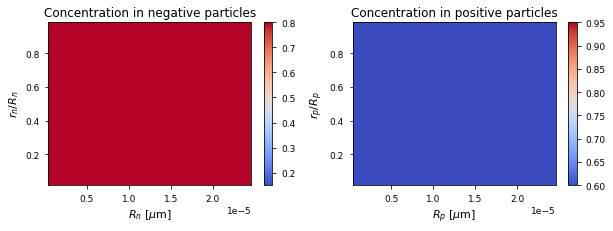

In [8]:
# Concentrations as a function of t, r and R
c_s_n = sim.solution["X-averaged negative particle concentration distribution"]
c_s_p = sim.solution["X-averaged positive particle concentration distribution"]

# dimensionless r_n, r_p
r_n = sim.solution["r_n"].entries[:,0,0]
r_p = sim.solution["r_p"].entries[:,0,0]
# dimensional R_n, R_p
R_n = sim.solution["Negative particle sizes [m]"].entries[:,0]
R_p = sim.solution["Positive particle sizes [m]"].entries[:,0]
t = sim.solution["Time [s]"].entries



def plot_concentrations(t):
    f, axs = plt.subplots(1, 2 ,figsize=(10,3))    
    plot_c_n = axs[0].pcolormesh(
        R_n, r_n, c_s_n(r=r_n, R=R_n, t=t), vmin=0.15, vmax=0.8
    )
    plot_c_p = axs[1].pcolormesh(
        R_p, r_p, c_s_p(r=r_p, R=R_p, t=t), vmin=0.6, vmax=0.95
    )
    axs[0].set_xlabel(r'$R_n$ [$\mu$m]')
    axs[1].set_xlabel(r'$R_p$ [$\mu$m]')
    axs[0].set_ylabel(r'$r_n / R_n$')
    axs[1].set_ylabel(r'$r_p / R_p$')
    axs[0].set_title('Concentration in negative particles')
    axs[1].set_title('Concentration in positive particles')
    plt.colorbar(plot_c_n, ax=axs[0])
    plt.colorbar(plot_c_p, ax=axs[1])
    
    plt.show()
    
    
# initial time
plot_concentrations(t[0])

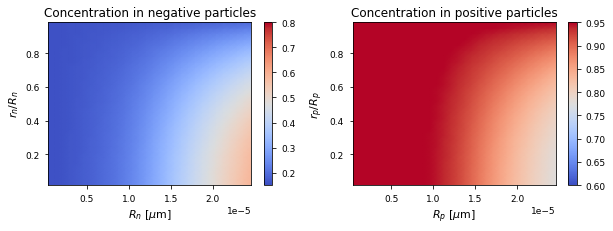

In [9]:
# final time
plot_concentrations(t[-1])

## Input custom particle-size distributions

In order to solve the MPM, one must input the area-weighted particle-size distribution $f_{\text{k},a}$ for each electrode $\text{k}=\text{n,p}$ and the minimum and maximum radius limits $R_\text{k,min}$, $R_\text{k,max}$. The default distributions $f_{\text{k},a}$, usable with the Marquis et al. [[6]](#References) parameter set, are lognormals with means equal to the `"Negative particle radius [m]"` and `"Positive particle radius [m]"` values, and standard deviations equal to 0.3 times the mean.

You can input any size distribution $f_{\text{k},a}(R_\text{k})$ as a function of $R_\text{k}$, which we will now demonstrate.

Note: $f_{\text{k},a}(R_\text{k})$ should ideally integrate to 1 over the specified $R_\text{k}$ range, although it is automatically normalized within PyBaMM anyway. A distribution such as a lognormal, once restricted to $[R_\text{k,min},R_\text{k,max}]$, discretized, and then renormalized, strictly will not integrate to 1 or have the originally desired mean or variance. The mean and variance of the final discretized distribution can be checked as output variables (see below). Having a sufficient number of mesh points in $R_\text{k}$ or a sufficiently wide interval $[R_\text{k,min},R_\text{k,max}]$ should alleviate this issue, however.

In [10]:
# Parameter set (no distribution parameters by default)
params = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Marquis2019)

# Extract the radii values. We will choose these to be the means of our area-weighted distributions
R_a_n_dim = params["Negative particle radius [m]"]
R_a_p_dim = params["Positive particle radius [m]"]

# Standard deviations (dimensional)
sd_a_n_dim = 0.2 * R_a_n_dim 
sd_a_p_dim = 0.6 * R_a_p_dim

# Minimum and maximum particle sizes (dimensional)
R_min_n = 0
R_min_p = 0
R_max_n = 2 * R_a_n_dim
R_max_p = 3 * R_a_p_dim

# Set the area-weighted particle-size distributions.
# Choose a lognormal (but any pybamm function could be used)
def f_a_dist_n_dim(R):
    return pybamm.lognormal(R, R_a_n_dim, sd_a_n_dim)


def f_a_dist_p_dim(R):
    return pybamm.lognormal(R, R_a_p_dim, sd_a_p_dim)

# Note: the only argument must be the particle size R


In [11]:
# input distribution params to the dictionary
distribution_params = {
    "Negative minimum particle radius [m]": R_min_n,
    "Positive minimum particle radius [m]": R_min_p,
    "Negative maximum particle radius [m]": R_max_n,
    "Positive maximum particle radius [m]": R_max_p,
    "Negative area-weighted "
    + "particle-size distribution [m-1]": f_a_dist_n_dim,
    "Positive area-weighted "
    + "particle-size distribution [m-1]": f_a_dist_p_dim,
}
params.update(distribution_params, check_already_exists=False)


In [12]:
sim = pybamm.Simulation(model, parameter_values=params)
sim.solve(t_eval=[0, 3600])

sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3511.0164027810006, step=35.11016402781001),…

The discretized size distributions can be plotted as histograms. Only the area-weighted distribution has been input, but the corresponding number and volume-weighted ones are also given as output variables.

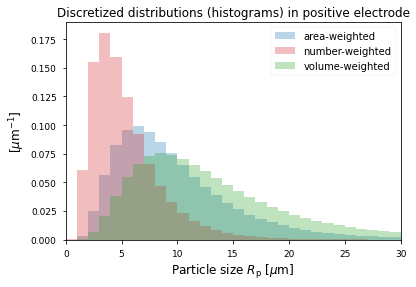

In [13]:

# The discrete sizes or "bins" used, and the distributions
R_p = sim.solution["Positive particle sizes [m]"].entries[:,0] # const in the current collector direction
# The distributions
f_a_p = sim.solution["X-averaged positive area-weighted particle-size distribution [m-1]"].entries[:,0]
f_num_p = sim.solution["X-averaged positive number-based particle-size distribution [m-1]"].entries[:,0]
f_v_p = sim.solution["X-averaged positive volume-weighted particle-size distribution [m-1]"].entries[:,0]


# plot
width_p = (R_p[-1] - R_p[-2])/ 1e-6
plt.bar(R_p / 1e-6, f_a_p * 1e-6, width=width_p, alpha=0.3, color="tab:blue",
           label="area-weighted")
plt.bar(R_p / 1e-6, f_num_p * 1e-6, width=width_p, alpha=0.3, color="tab:red",
           label="number-weighted")
plt.bar(R_p / 1e-6, f_v_p * 1e-6, width=width_p, alpha=0.3, color="tab:green",
           label="volume-weighted")
plt.xlim((0,30))
plt.xlabel("Particle size $R_{\mathrm{p}}$ [$\mu$m]", fontsize=12)
plt.ylabel("[$\mu$m$^{-1}$]", fontsize=12)
plt.legend(fontsize=10)
plt.title("Discretized distributions (histograms) in positive electrode")
plt.show()

### Vary standard deviation as an input parameter
You may define the standard deviation (or other distribution parameters except for the min or max radii) of the distribution as a pybamm "input" parameter, to quickly change the distribution at the solve stage.

In [14]:
# Define standard deviation in negative electrode to vary
sd_a_p_dim = pybamm.Parameter("Positive electrode area-weighted particle-size standard deviation [m]")

# Set the area-weighted particle-size distribution
def f_a_dist_p_dim(R):
    return pybamm.lognormal(R, R_a_p_dim, sd_a_p_dim)

# input to param dictionary
distribution_params = {
    "Positive electrode area-weighted particle-size "
    + "standard deviation [m]": "[input]",
    "Positive area-weighted "
    + "particle-size distribution [m-1]": f_a_dist_p_dim,
}
params.update(distribution_params, check_already_exists=False)

In [15]:
# Experiment with a relaxation period, to see the effect of distribution width
experiment = pybamm.Experiment(["Discharge at 1 C for 3400 s", "Rest for 1 hours"])

sim = pybamm.Simulation(model, parameter_values=params, experiment=experiment)
solutions = []
for sd_a_p in [0.4, 0.6, 0.8]: 
    solution = sim.solve(
        inputs={
            "Positive electrode area-weighted particle-size "
            + "standard deviation [m]": sd_a_p * R_a_p_dim
        }
    )
    solutions.append(solution)


pybamm.dynamic_plot(
    solutions,
    output_variables=output_variables,
    labels=["MPM, sd_a_p=0.4", "MPM, sd_a_p=0.6", "MPM, sd_a_p=0.8"]
)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.9444444444444444, step=0.01944444444444444…

## Check the distribution statistics
The mean and standard deviations of the final discretized distributions can be investigated using the output variables `"Negative area-weighted mean particle radius"` and `"Negative area-weighted particle-size standard deviation"`, etc.

In [16]:
print("The mean of the input lognormal was:", R_a_p_dim)
print("The means of discretized distributions are:") 
for solution in solutions:
    R = solution["Positive area-weighted mean particle radius [m]"]
    print("Positive area-weighted mean particle radius [m]", R.entries[0])

The mean of the input lognormal was: 1e-05
The means of discretized distributions are:
Positive area-weighted mean particle radius [m] 9.972515783613799e-06
Positive area-weighted mean particle radius [m] 9.673853099212895e-06
Positive area-weighted mean particle radius [m] 9.124186918191047e-06


In [17]:
print("The standard deviations of the input lognormal were:")
print(0.4 * R_a_p_dim)
print(0.6 * R_a_p_dim)
print(0.8 * R_a_p_dim)
print("The standard deviations of discretized distributions are:") 
for solution in solutions:
    sd = solution["Positive area-weighted particle-size standard deviation [m]"]
    print("Positive area-weighted particle-size standard deviation [m]", sd.entries[0])

The standard deviations of the input lognormal were:
4.000000000000001e-06
6e-06
8.000000000000001e-06
The standard deviations of discretized distributions are:
Positive area-weighted particle-size standard deviation [m] 3.918218937679725e-06
Positive area-weighted particle-size standard deviation [m] 5.180362201055076e-06
Positive area-weighted particle-size standard deviation [m] 5.815728559306213e-06


## Compare to SPM and DFN
The MPM can also be easily compared to PyBaMM models with a single particle size. The standard output variables are computed in the MPM, averaging over the particle size domain.

In [18]:
models = [
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.MPM(),
    pybamm.lithium_ion.DFN()
]

# solve
sims = []
for model in models:
    sim = pybamm.Simulation(model)
    sim.solve(t_eval=[0, 3500])
    sims.append(sim)

# plot
pybamm.dynamic_plot(sims)

interactive(children=(FloatSlider(value=0.0, description='t', max=3500.0, step=35.0), Output()), _dom_classes=…

## Model options
The MPM is compatible with the current collector and thermal models (except the "x-full" thermal option). Currently, the MPM is not compatible with the various degradation submodels in PyBaMM (i.e. SEI models, particle cracking/swelling, or lithium plating).

### Fickian diffusion vs Uniform profile
One can choose from Fickian diffusion or a uniform concentration profile within the particles. Teh default is "Fickian diffusion".

In [19]:
model_Fickian = pybamm.lithium_ion.MPM(name="MPM Fickian")
model_Uniform = pybamm.lithium_ion.MPM(
    name="MPM Uniform",
    options={"particle": "uniform profile"}
)

sim_Fickian = pybamm.Simulation(model_Fickian)
sim_Uniform = pybamm.Simulation(model_Uniform)

sim_Fickian.solve(t_eval=[0, 3500])
sim_Uniform.solve(t_eval=[0, 3500])

pybamm.dynamic_plot([sim_Fickian, sim_Uniform], output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3500.0, step=35.0), Output()), _dom_classes=…

### 1D current collector model
Add another macroscale dimension "z", employing the "potential pair" option solving for the potential in the current collectors.

In [20]:
# choose model options
model_cc = pybamm.lithium_ion.MPM(
    options={
        "current collector": "potential pair",
        "dimensionality": 1,
        "particle": "uniform profile", # to reduce computation time
    }
)

# solve
sim_cc = pybamm.Simulation(model_cc)
sim_cc.solve(t_eval=[0, 3600])

# variables to plot
output_variables = [
    "X-averaged negative particle surface concentration distribution",
    "X-averaged positive particle surface concentration distribution",
    "X-averaged positive electrode interfacial current density distribution",
    "Negative current collector potential [V]",
    "Positive current collector potential [V]",
    "Terminal voltage [V]",
]
pybamm.dynamic_plot(sim_cc, output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## References

The relevant papers for this notebook are:

In [21]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Toby L. Kirk, Jack Evans, Colin P. Please, and S. Jonathan Chapman. Modelling electrode heterogeneity in lithium-ion batteries: unimodal and bimodal particle-size distributions. arXiv:2006.12208, 2020. URL: https://arxiv.org/abs/2006.1